In [3]:
#Import packages
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

## Create custom TensorFlowLite model for Android Application

In [55]:
#Load data
df = pd.read_csv('df.csv', sep=',')
df['food'].apply(str)

#Pre-process categorical features
df = pd.get_dummies(df, prefix=['sex', 'country', 'treatment'], columns=['sex', 'country', 'treatment'])

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df.food)
df['label'] = le.transform(df.food.get_values())
df = df.drop(['food', 'user_id'], axis=1)
df = df.fillna(0)

In [46]:
df.head(5)

,lifestyle,pain,alcohol,age,Allergies,Anxiety,Arthritis,Asthma,Back pain,Chronic Migraines,...,treatment_heat pack,treatment_heating pads,treatment_massage,treatment_neurostimulator implant,treatment_omega-3,treatment_physical therapy,treatment_rescue remedy night,treatment_salofalk,treatment_trazadone,label
0,NaN,NaN,1,30.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
1,NaN,NaN,1,34.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,8
2,NaN,NaN,1,28.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,4
3,NaN,NaN,1,28.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,4
4,NaN,NaN,1,28.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1


In [65]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]
from sklearn.preprocessing import Normalizer
transformer = Normalizer(norm='l2').fit(X) # fit does nothing.
transformer.transform(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape

(9377, 266)

In [78]:
#Baseline model
baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works. 
    keras.layers.Dense(16, activation=tf.nn.relu,),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

baseline_model.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy','binary_crossentropy'])

baseline_history = baseline_model.fit(X_train.values,
                                      y_train.values,
                                      epochs=40,
                                      batch_size=512,
                                      validation_data=(X_test.values, y_test.values),
                                      verbose=1)

Train on 9377 samples, validate on 4619 samples
Epoch 1/40
9377/9377 [==============================] - 1s 123us/step - loss: 2.3769 - acc: 0.1304 - binary_crossentropy: 10.4184 - val_loss: 2.2525 - val_acc: 0.1821 - val_binary_crossentropy: 10.0424
Epoch 2/40
9377/9377 [==============================] - 0s 26us/step - loss: 2.2216 - acc: 0.1811 - binary_crossentropy: 9.9738 - val_loss: 2.1929 - val_acc: 0.1823 - val_binary_crossentropy: 10.0556
Epoch 3/40
9377/9377 [==============================] - 0s 25us/step - loss: 2.1837 - acc: 0.1817 - binary_crossentropy: 10.1177 - val_loss: 2.1712 - val_acc: 0.1847 - val_binary_crossentropy: 10.1820
Epoch 4/40
9377/9377 [==============================] - 0s 26us/step - loss: 2.1625 - acc: 0.1855 - binary_crossentropy: 10.1678 - val_loss: 2.1550 - val_acc: 0.1853 - val_binary_crossentropy: 10.2446
Epoch 5/40
9377/9377 [==============================] - 0s 25us/step - loss: 2.1461 - acc: 0.1945 - binary_crossentropy: 10.2635 - val_loss: 2.1424 

In [80]:
#Bigger model
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu,),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.softmax)
])

bigger_model.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_history = bigger_model.fit(X_train.values, y_train.values,
                                  epochs=40,
                                  batch_size=512,
                                  validation_data=(X_test.values, y_test.values),
                                  verbose=1)

Train on 9377 samples, validate on 4619 samples
Epoch 1/40
9377/9377 [==============================] - 6s 678us/step - loss: 2.4590 - acc: 0.1659 - binary_crossentropy: 39.0629 - val_loss: 2.1732 - val_acc: 0.2044 - val_binary_crossentropy: 52.7018
Epoch 2/40
9377/9377 [==============================] - 5s 574us/step - loss: 2.1280 - acc: 0.2124 - binary_crossentropy: 54.5436 - val_loss: 2.1078 - val_acc: 0.2169 - val_binary_crossentropy: 56.4799
Epoch 3/40
9377/9377 [==============================] - 6s 600us/step - loss: 2.0827 - acc: 0.2247 - binary_crossentropy: 56.5901 - val_loss: 2.0924 - val_acc: 0.2113 - val_binary_crossentropy: 57.3610
Epoch 4/40
9377/9377 [==============================] - 9s 994us/step - loss: 2.0887 - acc: 0.2187 - binary_crossentropy: 56.9517 - val_loss: 2.1032 - val_acc: 0.2102 - val_binary_crossentropy: 56.9860
Epoch 5/40
9377/9377 [==============================] - 10s 1ms/step - loss: 2.0632 - acc: 0.2252 - binary_crossentropy: 56.5549 - val_loss: 2.0

In [87]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation=tf.nn.softmax)
])

dpt_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(X_train.values, y_train.values,
                                  epochs=40,
                                  batch_size=512,
                                  validation_data=(X_test.values, y_test.values),
                                  verbose=1)

Train on 9377 samples, validate on 4619 samples
Epoch 1/40
9377/9377 [==============================] - 7s 771us/step - loss: 3.1519 - acc: 0.1401 - binary_crossentropy: 35.4565 - val_loss: 2.2302 - val_acc: 0.1875 - val_binary_crossentropy: 29.4434
Epoch 2/40
9377/9377 [==============================] - 6s 608us/step - loss: 2.4099 - acc: 0.1622 - binary_crossentropy: 31.3979 - val_loss: 2.1804 - val_acc: 0.2074 - val_binary_crossentropy: 29.8120
Epoch 3/40
9377/9377 [==============================] - 6s 622us/step - loss: 2.2694 - acc: 0.1710 - binary_crossentropy: 35.3820 - val_loss: 2.1394 - val_acc: 0.2070 - val_binary_crossentropy: 32.2560
Epoch 4/40
9377/9377 [==============================] - 6s 637us/step - loss: 2.2075 - acc: 0.1844 - binary_crossentropy: 36.4338 - val_loss: 2.1179 - val_acc: 0.2137 - val_binary_crossentropy: 34.3756
Epoch 5/40
9377/9377 [==============================] - 6s 622us/step - loss: 2.1738 - acc: 0.1860 - binary_crossentropy: 38.2980 - val_loss: 2.

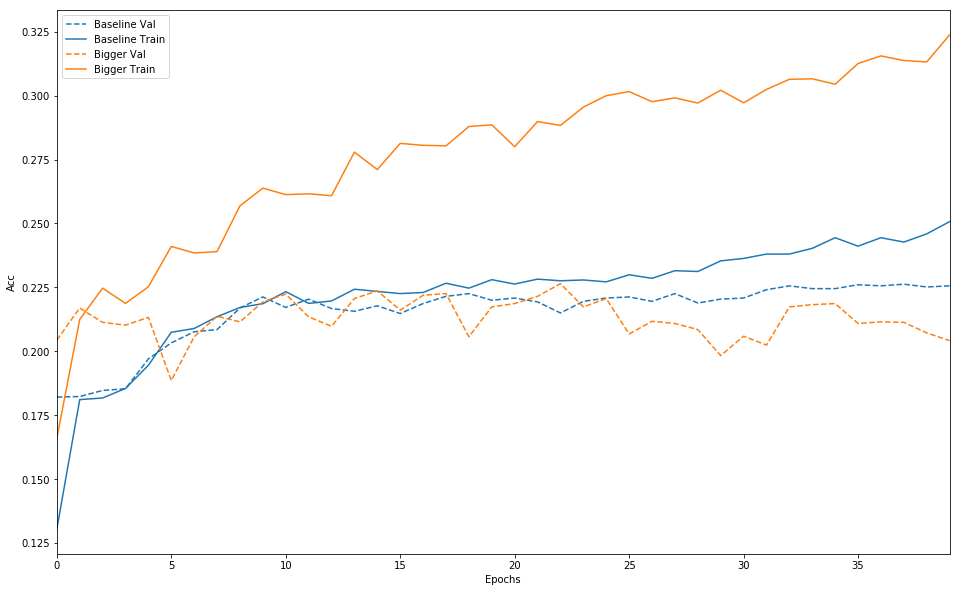

In [83]:
import matplotlib.pyplot as plt
def plot_history(histories, key='acc'):
  plt.figure(figsize=(16,10))
    
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('bigger', bigger_history)])

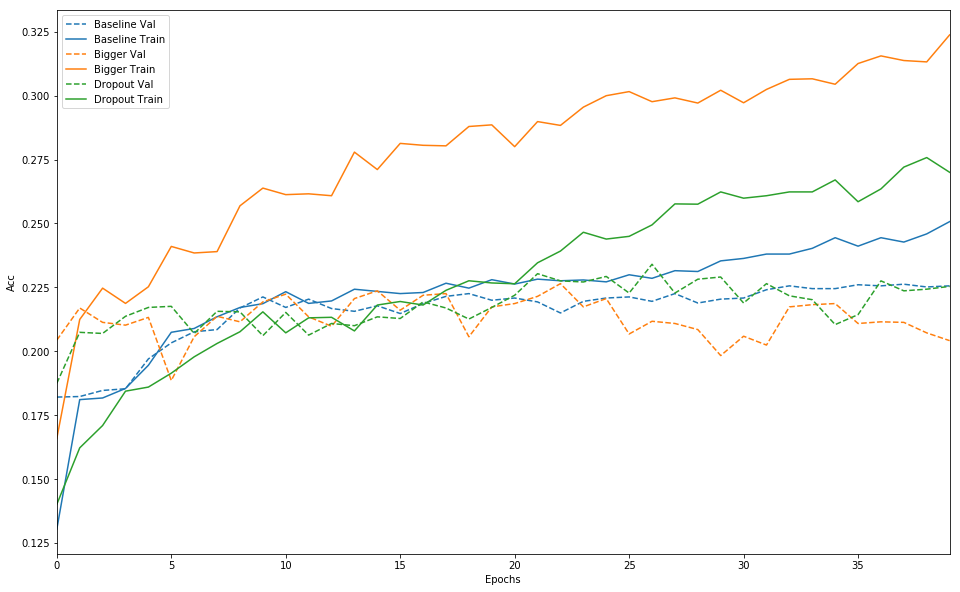

In [88]:
plot_history([('baseline', baseline_history),
              ('bigger', bigger_history),
              ('dropout', dpt_model_history)])

In [89]:
from __future__ import absolute_import, division, print_function

import os

# include the epoch in the file name. (uses `str.format`)
checkpoint_path = "/Users/ajay/insight/hackumass/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path, verbose=1, save_weights_only=True,
    # Save weights, every 5-epochs.
    period=5)


bigger_model.fit(X_train.values, y_train.values,
                 epochs = 50,
                 batch_size=512,
                validation_data = (X_test.values,y_test.values),
              callbacks = [cp_callback], verbose=0)  # pass callback to training

bigger_model.save('my_model.h5')


Epoch 00005: saving model to /Users/ajay/insight/hackumass/cp-0005.ckpt

Epoch 00010: saving model to /Users/ajay/insight/hackumass/cp-0010.ckpt

Epoch 00015: saving model to /Users/ajay/insight/hackumass/cp-0015.ckpt

Epoch 00020: saving model to /Users/ajay/insight/hackumass/cp-0020.ckpt

Epoch 00025: saving model to /Users/ajay/insight/hackumass/cp-0025.ckpt

Epoch 00030: saving model to /Users/ajay/insight/hackumass/cp-0030.ckpt

Epoch 00035: saving model to /Users/ajay/insight/hackumass/cp-0035.ckpt

Epoch 00040: saving model to /Users/ajay/insight/hackumass/cp-0040.ckpt

Epoch 00045: saving model to /Users/ajay/insight/hackumass/cp-0045.ckpt

Epoch 00050: saving model to /Users/ajay/insight/hackumass/cp-0050.ckpt
